In [1]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import quandl
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import style
style.use('ggplot')

ImportError: No module named quandl

In [2]:
quandl.ApiConfig.api_key = 'Ri7BNHzdujUt3zYB7NQr'

NameError: name 'quandl' is not defined

In [3]:
start = "2014-01-01"
end = "2016-12-31"
df = quandl.get("WIKI/FB", start_date= start, end_date= end)

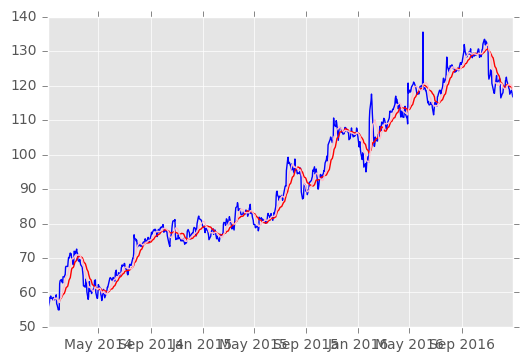

In [57]:
graph_data = df['Adj. High']
plt.plot(price_data, color = 'blue')


moving_avg_20 = graph_data.rolling(window = 20, center =False).mean()
plt.plot(moving_avg_20, color='red')

moving_avg_10 = graph_data.rolling(window = 10, center =False).mean()
plt.plot(moving_avg_10, color='pink')

plt.show()

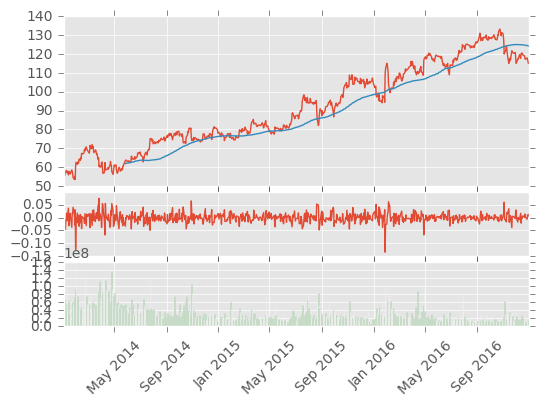

In [86]:
ax1 = plt.subplot2grid((9,1), (0,0), rowspan =5, colspan=1)
ax2 = plt.subplot2grid((9,1), (5,0), rowspan =2, colspan=1, sharex = ax1)
ax3 = plt.subplot2grid((9,1), (7,0), rowspan =2, colspan=1, sharex = ax1)

# plot Adj Close with 100 Moving Average plus Volume underneath
df['percent_change'] = (df['Adj. Close'].shift(1)-df['Adj. Close'])/df['Adj. Close']
df['100ma'] = df['Adj. Close'].rolling(window=100).mean()

ax1.plot(df.index, df['Adj. Close'])
ax1.plot(df.index, df['100ma'])
ax2.plot(df.index, df['percent_change'])
ax3.bar(df.index, df['Volume'], color = 'green')

for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(45)

plt.show()

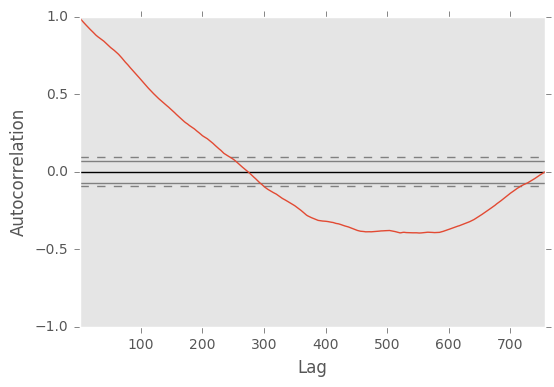

In [76]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Adj. Close'])

The correlation from the lag decreases as time extends into the past.

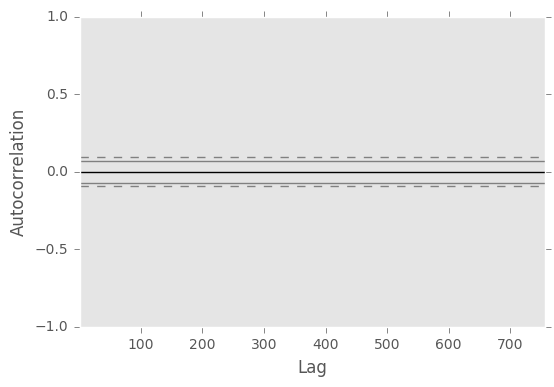

In [77]:
autocorrelation_plot(df['percent_change'])

In [63]:
days = 7

In [65]:
def create_lag_prices(days):
    for i in range(1, days+1):
        price_data['AdjClose_{}d'.format(i)] = df['Adj. Close'].shift(i)
    return price_data

In [ ]:
def create_lag_percent_change(days):
    for i in range(1, days+1):
        price_data['AdjClose_{}d'.format(i)] = (df['Adj. Close'].shift(i) - df['Adj. Close'])/df['Adj. Close']
    return price_data

In [67]:
create_lag_prices(days)
create_lag_percent_change(days)

C:\Users\Collin\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Adj. Close,AdjClose_1d,AdjClose_2d,AdjClose_3d,AdjClose_4d,AdjClose_5d,AdjClose_6d,AdjClose_7d,Close_%Change_4d,Close_%Change_1d,Close_%Change_2d,Close_%Change_3d,Close_%Change_5d,Close_%Change_6d,Close_%Change_7d
Date,,,,,,,,,,,,,,,
2014-01-02,54.710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,54.557,54.710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002804,NaN,NaN,NaN,NaN,NaN
2014-01-06,57.200,54.557,54.710,NaN,NaN,NaN,NaN,NaN,NaN,-0.046206,-0.043531,NaN,NaN,NaN,NaN
2014-01-07,57.920,57.200,54.557,54.710,NaN,NaN,NaN,NaN,NaN,-0.012431,-0.058063,-0.055421,NaN,NaN,NaN
2014-01-08,58.230,57.920,57.200,54.557,54.710,NaN,NaN,NaN,-0.060450,-0.005324,-0.017688,-0.063077,NaN,NaN,NaN
2014-01-09,57.220,58.230,57.920,57.200,54.557,54.710,NaN,NaN,-0.046540,0.017651,0.012233,-0.000350,-0.043866,NaN,NaN
2014-01-10,57.940,57.220,58.230,57.920,57.200,54.557,54.710,NaN,-0.012772,-0.012427,0.005005,-0.000345,-0.058388,-0.055747,NaN
2014-01-13,55.910,57.940,57.220,58.230,57.920,57.200,54.557,54.710,0.035951,0.036308,0.023431,0.041495,0.023073,-0.024200,-0.021463
2014-01-14,57.740,55.910,57.940,57.220,58.230,57.920,57.200,54.557,0.008486,-0.031694,0.003464,-0.009006,0.003117,-0.009352,-0.055126


In [33]:
price_data.head()

,Adj. Close,AdjClose_1d,AdjClose_2d,AdjClose_3d,AdjClose_4d,AdjClose_5d,AdjClose_6d,AdjClose_7d,Close_%Change_4d
Date,,,,,,,,,
2014-01-02,54.710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,54.557,54.710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,57.200,54.557,54.710,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,57.920,57.200,54.557,54.710,NaN,NaN,NaN,NaN,NaN
2014-01-08,58.230,57.920,57.200,54.557,54.71,NaN,NaN,NaN,-0.06045


In [34]:
price_data.corr()

,Adj. Close,AdjClose_1d,AdjClose_2d,AdjClose_3d,AdjClose_4d,AdjClose_5d,AdjClose_6d,AdjClose_7d,Close_%Change_4d
Adj. Close,1.000000,0.997200,0.994230,0.991353,0.989177,0.987348,0.985449,0.983968,-0.032601
AdjClose_1d,0.997200,1.000000,0.997198,0.994226,0.991352,0.989166,0.987336,0.985449,0.000503
AdjClose_2d,0.994230,0.997198,1.000000,0.997193,0.994219,0.991338,0.989149,0.987324,0.038885
AdjClose_3d,0.991353,0.994226,0.997193,1.000000,0.997190,0.994209,0.991322,0.989135,0.077360
AdjClose_4d,0.989177,0.991352,0.994219,0.997190,1.000000,0.997185,0.994198,0.991306,0.110179
AdjClose_5d,0.987348,0.989166,0.991338,0.994209,0.997185,1.000000,0.997179,0.994191,0.099477
AdjClose_6d,0.985449,0.987336,0.989149,0.991322,0.994198,0.997179,1.000000,0.997178,0.089212
AdjClose_7d,0.983968,0.985449,0.987324,0.989135,0.991306,0.994191,0.997178,1.000000,0.078999
Close_%Change_4d,-0.032601,0.000503,0.038885,0.077360,0.110179,0.099477,0.089212,0.078999,1.000000


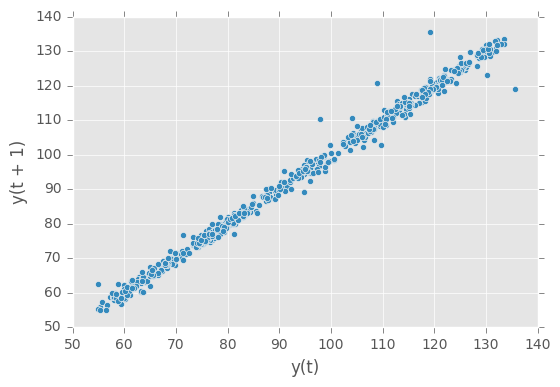

In [43]:
from pandas.tools.plotting import lag_plot
lag_plot(graph_data,)

In [9]:
df.corr()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Open,1.000000,0.998879,0.998915,0.998211,-0.488565,NaN,NaN,1.000000,0.998879,0.998915,0.998211,-0.488565
High,0.998879,1.000000,0.998388,0.998842,-0.480558,NaN,NaN,0.998879,1.000000,0.998388,0.998842,-0.480558
Low,0.998915,0.998388,1.000000,0.999067,-0.507362,NaN,NaN,0.998915,0.998388,1.000000,0.999067,-0.507362
Close,0.998211,0.998842,0.999067,1.000000,-0.494366,NaN,NaN,0.998211,0.998842,0.999067,1.000000,-0.494366
Volume,-0.488565,-0.480558,-0.507362,-0.494366,1.000000,NaN,NaN,-0.488565,-0.480558,-0.507362,-0.494366,1.000000
Ex-Dividend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Split Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adj. Open,1.000000,0.998879,0.998915,0.998211,-0.488565,NaN,NaN,1.000000,0.998879,0.998915,0.998211,-0.488565
Adj. High,0.998879,1.000000,0.998388,0.998842,-0.480558,NaN,NaN,0.998879,1.000000,0.998388,0.998842,-0.480558
Adj. Low,0.998915,0.998388,1.000000,0.999067,-0.507362,NaN,NaN,0.998915,0.998388,1.000000,0.999067,-0.507362


In [ ]:
from statsmodels.tsa. import arima_model.ARIMA as arima

arima.fit(graph_data)